In [ ]:
#/u/ki/lehmann/lustre/multidark/NewMDPL/hlists/hlist_1.00000.npy

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from helpers.SimulationAnalysis import readHlist
from fast3tree import fast3tree
from notebook_load_functions import *

In [11]:
plt.rcdefaults()
%matplotlib inline
plt.rcParams['font.size'] = 16.0
plt.rcParams['font.family'] = 'serif'


## load pair counts of samples

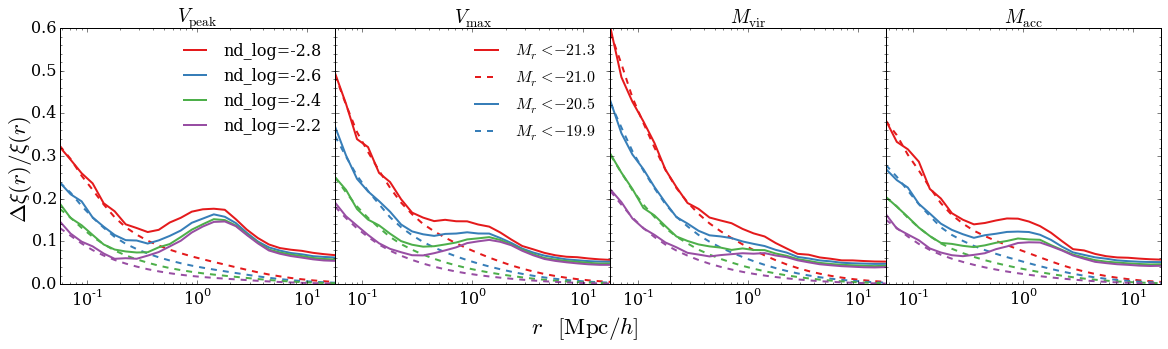

In [8]:
from palettable.colorbrewer.qualitative import Set1_4
def get_color(i):
    return Set1_4.mpl_colors[i]

x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir','macc']
nd_log_list_this = (-2.8, -2.6,-2.4, -2.2)
box_size = 125.
case = 'MDhigh'
if case=='darksky': 
    proxies = ['vpeak', 'vmax', 'mvir']

fig, axarr = plt.subplots(ncols=len(proxies), nrows=1, figsize=(4*len(proxies), 4.5), sharex=True, sharey=True)

for i, (ax, proxy) in enumerate(zip(axarr, proxies)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_samples(proxy, nd_log, box_size, case)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1./np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
        ax.semilogx(x, y_poisson, c = get_color(j) , lw=2,ls='--')
        
        # change bins
        #samples1 = np.sum(samples.reshape((len(samples),-1,2)), axis=-1)
        #x_1 = rbins[1::2]
        #y_1 = np.std(samples1, axis=0)/ np.mean(samples1, axis=0)
        #ax.semilogx(x_1, y_1, c = get_color(j), lw=2, ls='-.')
        
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0,0.6)
    ax.minorticks_on()
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
    if not i: ax.legend(loc='best', frameon=False, ncol=1, fontsize='medium');
    if i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                        for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, fontsize='medium')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/multidark_sample_variance_333.png')

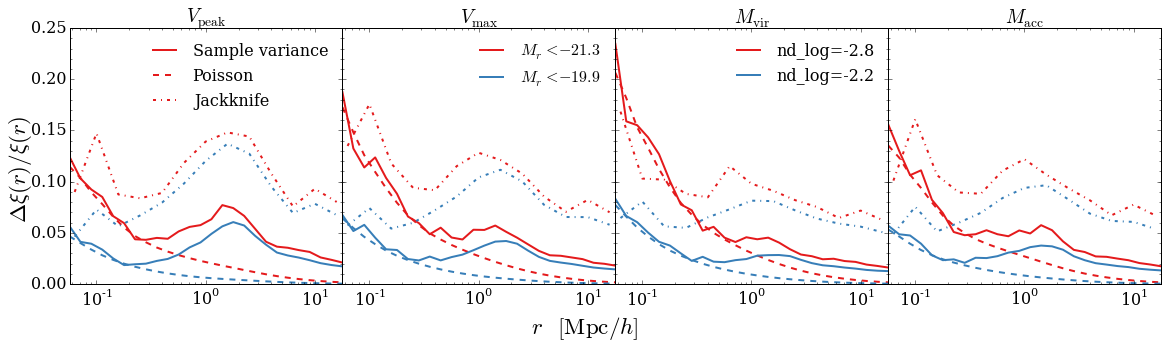

In [29]:
x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
nd_log_list_this = (-2.8,  -2.2)
case = 'c250-1024'
nJK=10

fig, axarr = plt.subplots(ncols=len(proxies), nrows=1, figsize=(16, 4.5), sharex=True, sharey=True)

for i, (ax, proxy) in enumerate(zip(axarr, proxies)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_samples(proxy, nd_log, 250)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
        ax.semilogx(x, y_poisson, c = get_color(j) , lw=2, ls = '--', 
                    label='nd_log={} Poisson error'.format(nd_log))
        lowJK = load_precalculated_JK(proxy, case, nd_log, nJK = nJK)
        ax.semilogx(rbins[1::2], (JK_std(lowJK, axis = 0)/ np.mean(lowJK, axis = 0)), ls='-.',
                    c = get_color(j),lw = 2, label ='nd_log={:.1f} JK error'.format(nd_log))
        
    ax.set_xlim(x[0], x[-1])
    ax.minorticks_on()
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
    
    # set legends
    handles, labels = ax.get_legend_handles_labels()
    if i==0: 
        ax.legend(handles[:3],['Sample variance','Poisson','Jackknife'] ,loc='best', 
                  frameon=False, ncol=1, fontsize='medium');
    if i==1:
        ax.legend(handles[::3], ['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) for nd_log in nd_log_list_this],
                  frameon=False, fontsize='medium')
    if i==2:
        ax.legend(handles[::3], labels[::3], frameon=False, fontsize='medium')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/multidark_error_vs_Poisson_250.png')


## subtract the Poisson part

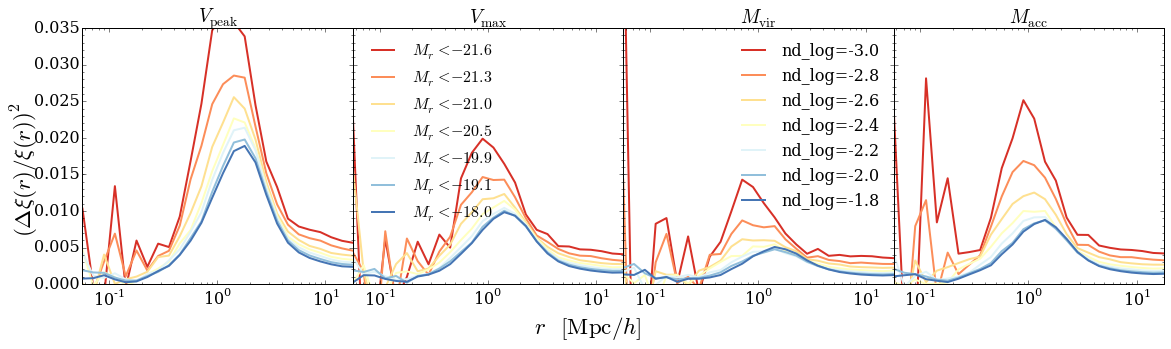

In [10]:
#Individual box
from palettable.colorbrewer.diverging import RdYlBu_7
def get_color(i):
    return RdYlBu_7.mpl_colors[i]


x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
#proxies = ['vpeak', 'vmax', 'mvir']
nd_log_list_this = (-3.0,-2.8, -2.6,-2.4,-2.2,-2.0,-1.8)
case = 'MDhigh'
box_size = 125.
 
fig, axarr = plt.subplots(ncols=len(proxies), nrows=1, figsize=(4*len(proxies), 4.5), sharex=True, sharey=True)

for i, (ax, proxy) in enumerate(zip(axarr, proxies)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_samples(proxy, nd_log, box_size, case)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y**2 - y_poisson**2, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(-0.0,0.035)
    ax.minorticks_on()
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
    if i==2: ax.legend(loc='best', frameon=False, ncol=1, fontsize='medium');
    if i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                        for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, fontsize='medium')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$(\Delta \xi(r)/ \xi(r))^2$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/multidarklowres_z3_subtract_poisson_125.png')

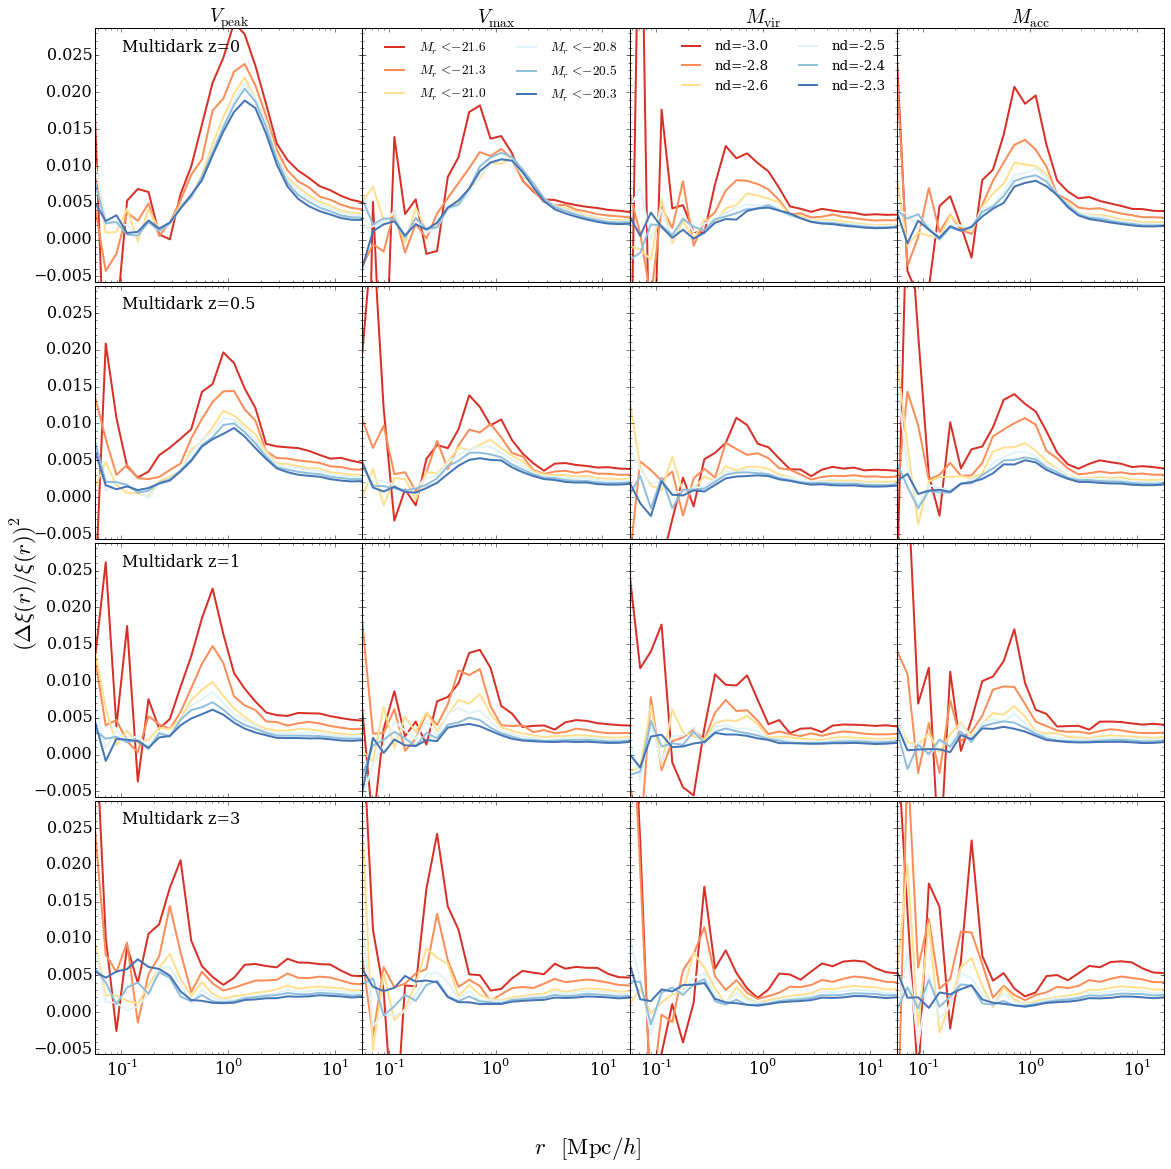

In [8]:
from palettable.colorbrewer.diverging import RdYlBu_6
def get_color(i):
    return RdYlBu_6.mpl_colors[i]

def ylim(box_size, case):
    return 10.**(-1.25*np.log10(box_size) + 1.85)

x = 0.5*(rbins[1:] + rbins[:-1])
cases = ['MDlow', 'lowres_z05','lowres_z1','lowres_z3']
legend_dict = {'MDlow':'Multidark z=0','lowres_z05':'Multidark z=0.5','lowres_z1':'Multidark z=1','lowres_z3':'Multidark z=3'}
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
nd_log_list_this = ( -3.0, -2.8, -2.6,-2.5, -2.4, -2.3)
box_size = 125.
    
fig, axmat = plt.subplots(ncols=len(proxies), nrows=len(cases), figsize=(4*len(proxies), 4*len(cases)), sharex=True, sharey='row')

for k , (axarr, case) in enumerate(zip(axmat, cases)):
    for i, (ax, proxy) in enumerate(zip(axarr, proxies)): 
        for j, nd_log in enumerate(nd_log_list_this):
            samples = load_samples(proxy, nd_log, box_size, case)
            Nmean = np.mean(samples, axis=0)
            y = np.std(samples, axis=0)/ Nmean
            
            Nh = 10**nd_log*box_size**3
            Npairs = Nh*(Nh-1)/2.
            poisson_correction = np.sqrt(1.-Nmean/Npairs)
            y_poisson = 1/np.sqrt(Nmean)*poisson_correction
            ax.semilogx(x, y**2 - y_poisson**2, c = get_color(j) , lw=2, label='nd={}'.format(nd_log))
            #ax.semilogx(x, y - y_poisson, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
        ax.set_xlim(x[0], x[-1])
        ax.set_ylim(-0.2*ylim(box_size, case)**2,1.0*ylim(box_size, case)**2)
        #ax.set_ylim(-0.2*ylim(box_size, case),ylim(box_size, case))
        ax.minorticks_on()
        if k==0: ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if k==0 and i==2: ax.legend(loc='best', frameon=False, ncol=2, fontsize='small');
        if k==0 and i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                            for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=2, fontsize='small')
        if i==0: ax.text(0.1, 0.96,'{}'.format(legend_dict[case]) , transform=ax.transAxes, va='top')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$(\Delta \xi(r)/ \xi(r))^2$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
plt.savefig('plots/multidarklowres_subtract_poisson_all_redshift.png')

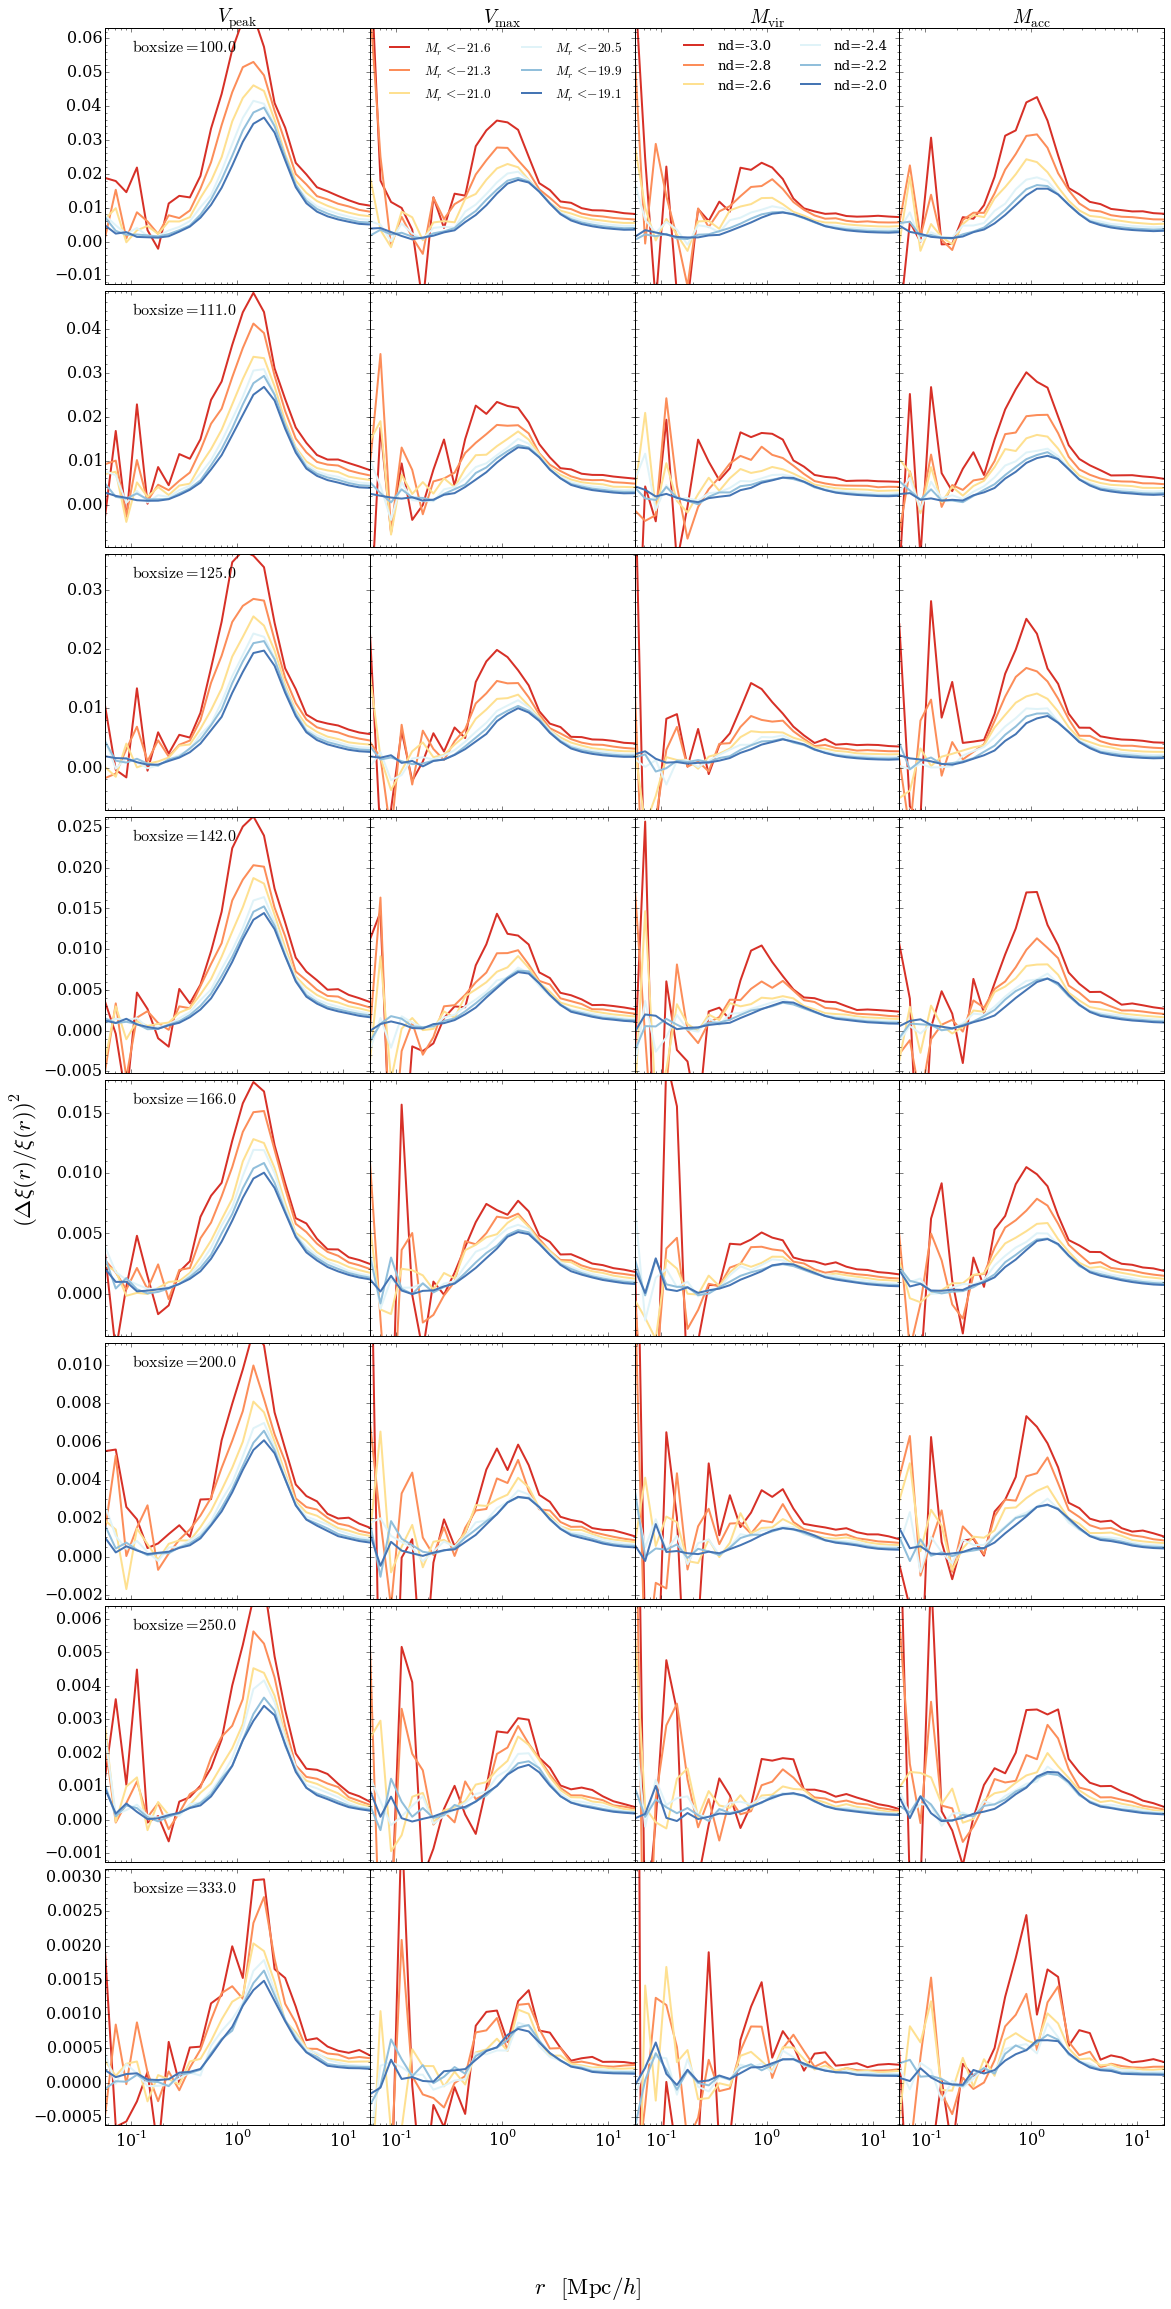

In [6]:
from palettable.colorbrewer.diverging import RdYlBu_6
def get_color(i):
    return RdYlBu_6.mpl_colors[i]

def ylim(box_size, case):
    if case == 'MDlow':
        return 10.**(-1.34*np.log10(box_size) + 2.1)
    return 10.**(-1.25*np.log10(box_size) + 1.9)

case = 'MDhigh'

x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
nd_log_list_this = ( -3.0, -2.8, -2.6 , -2.4, -2.2, -2.0)
if case=='darksky': 
    box_size_list = (100.,133.)
    proxies = ['vpeak', 'vmax', 'mvir']
if case=='MDlow': box_size_list = (125.,250.,333.)
if case=='MDhigh':box_size_list = (100., 111., 125.,142., 166., 200., 250., 333.)
    
fig, axmat = plt.subplots(ncols=len(proxies), nrows=len(box_size_list), figsize=(4*len(proxies), 4*len(box_size_list)), sharex=True, sharey='row')

for k , (axarr, box_size) in enumerate(zip(axmat, box_size_list)):
    for i, (ax, proxy) in enumerate(zip(axarr, proxies)): 
        for j, nd_log in enumerate(nd_log_list_this):
            samples = load_samples(proxy, nd_log, box_size, case)
            Nmean = np.mean(samples, axis=0)
            y = np.std(samples, axis=0)/ Nmean
            
            Nh = 10**nd_log*box_size**3
            Npairs = Nh*(Nh-1)/2.
            poisson_correction = np.sqrt(1.-Nmean/Npairs)
            y_poisson = 1/np.sqrt(Nmean)*poisson_correction
            ax.semilogx(x, y**2 - y_poisson**2, c = get_color(j) , lw=2, label='nd={}'.format(nd_log))
            #ax.semilogx(x, y , c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
        ax.set_xlim(x[0], x[-1])
        ax.set_ylim(-0.2*ylim(box_size, case)**2,1.0*ylim(box_size, case)**2)
        #ax.set_ylim(-0.2*ylim(box_size, case),ylim(box_size, case))
        ax.minorticks_on()
        if k==0: ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if k==0 and i==2: ax.legend(loc='best', frameon=False, ncol=2, fontsize='small');
        if k==0 and i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                            for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=2, fontsize='small')
        if i==0: ax.text(0.1, 0.96,r'${{\rm boxsize}}={0}$'.format(box_size) , transform=ax.transAxes, va='top')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$(\Delta \xi(r)/ \xi(r))^2$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/multidark_subtract_poisson_all.png')

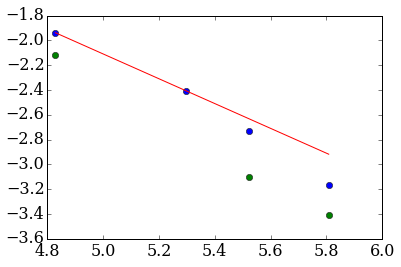

In [47]:
box = np.array([125.,200.,250.,333.])
lim = np.array([0.144,0.09,0.065,0.042])
box2 = np.array([333.,250.,125.])
lim2 = np.array([0.033,0.045,0.12])
inverse = 18./box


plt.plot(np.log(box), np.log(lim), 'o')
plt.plot(np.log(box2), np.log(lim2),'o')
plt.plot(np.log(box), np.log(inverse))


In [48]:
print np.polyfit(np.log10(box), np.log10(lim), 1)
print np.polyfit(np.log10(box2), np.log10(lim2), 1)

[-1.24964019  1.79833003]
[-1.33559676  1.87439438]


## remove host halos

In [30]:
_remove_samples_cache={}
_missing_cache={}
def load_remove_samples(proxy, nd_log, box_size = 125., case = 'MDhigh', verbal = False):
    key = (proxy, nd_log, box_size, case)
    if key not in _remove_samples_cache:
        if case == 'MDhigh':
            _remove_samples_cache[key] = []
            _missing_cache[key] = []
            n = int(1000/box_size)
            for i in range(n**3):
                fname = filepath.path_multidark + 'pairs_{}/boxsize_{}/remove_host/nd{:.1f}_idx{:03d}.npy'.format(proxy,int(box_size),nd_log , i)
                if os.path.isfile(fname):
                    _remove_samples_cache[key].extend(np.ediff1d(np.load(fname)).reshape((1,-1)))
                else:
                    _missing_cache[key].append(i)
            _remove_samples_cache[key] = np.array(_remove_samples_cache[key])
            _missing_cache[key] = np.array(_missing_cache[key])
            if verbal: print 'loaded{}{}{}{}'.format(*key)
            return _remove_samples_cache[key]
    return _remove_samples_cache[key]

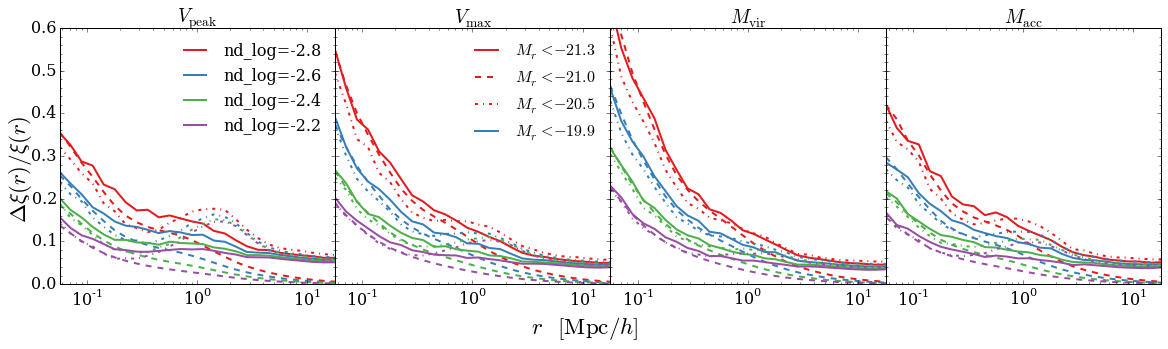

In [57]:
from palettable.colorbrewer.qualitative import Set1_4
def get_color(i):
    return Set1_4.mpl_colors[i]

x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir','macc']
nd_log_list_this = (-2.8, -2.6,-2.4, -2.2)
box_size = 125.
case = 'MDhigh'
if case=='darksky': 
    proxies = ['vpeak', 'vmax', 'mvir']

fig, axarr = plt.subplots(ncols=len(proxies), nrows=1, figsize=(4*len(proxies), 4.5), sharex=True, sharey=True)

for i, (ax, proxy) in enumerate(zip(axarr, proxies)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_remove_samples(proxy, nd_log, box_size, case)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1./np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
        ax.semilogx(x, y_poisson, c = get_color(j) , lw=2,ls='--')
        
        samples2 = load_samples(proxy, nd_log, box_size, case)
        y2 = np.std(samples2, axis=0)/ np.mean(samples2, axis=0)
        ax.semilogx(x, y2, c = get_color(j) , lw=2,ls='-.')
        
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0,0.6)
    ax.minorticks_on()
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
    if not i: ax.legend(loc='best', frameon=False, ncol=1, fontsize='medium');
    if i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                        for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, fontsize='medium')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');

In [37]:
proxy = 'macc'
load_remove_samples(proxy,-1.7).shape
_missing_cache[(proxy,-1.7,125.0,'MDhigh')]

array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 497, 498, 499, 500, 501, 502, 503,
       504, 505, 506, 507, 508, 509, 510, 511])

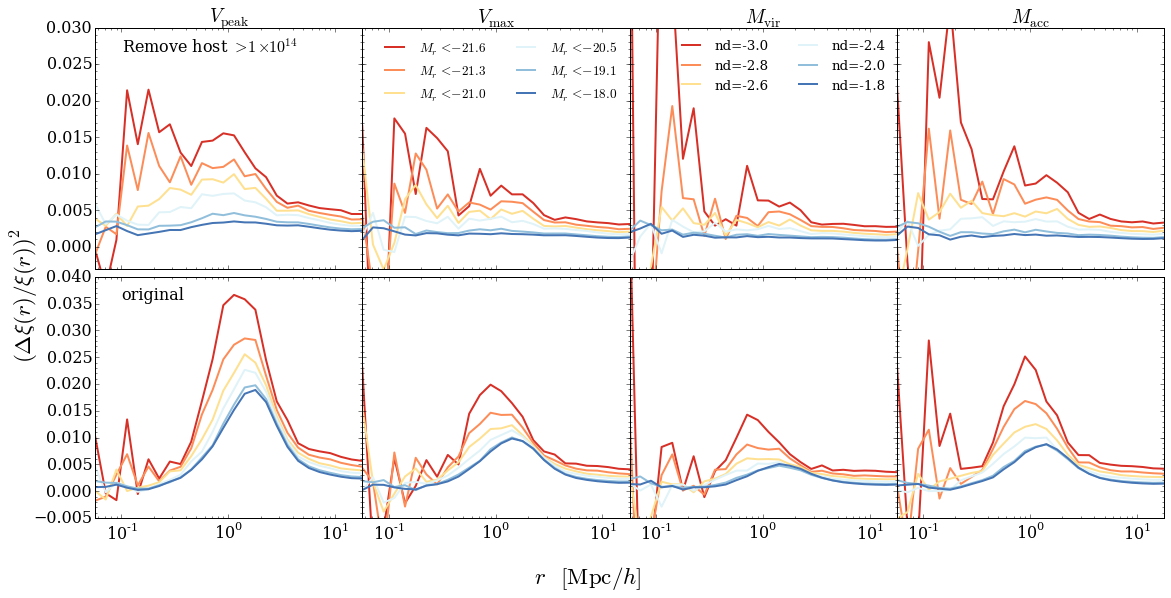

In [62]:
from palettable.colorbrewer.diverging import RdYlBu_6
def get_color(i):
    return RdYlBu_6.mpl_colors[i]

x = 0.5*(rbins[1:] + rbins[:-1])
case = 'MDhigh'
functions = (load_remove_samples, load_samples)
legend_dict = {0:r'Remove host $>1\times10^{14}$', 1: 'original'}
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
nd_log_list_this = ( -3.0, -2.8, -2.6,-2.4,-2.0, -1.8,)
box_size = 125.
    
fig, axmat = plt.subplots(ncols=len(proxies), nrows=len(functions), figsize=(4*len(proxies), 4*len(functions)), sharex=True, sharey='row')

for k , (axarr, func) in enumerate(zip(axmat, functions)):
    for i, (ax, proxy) in enumerate(zip(axarr, proxies)): 
        for j, nd_log in enumerate(nd_log_list_this):
            samples = func(proxy, nd_log, box_size, case)
            Nmean = np.mean(samples, axis=0)
            y = np.std(samples, axis=0)/ Nmean
            
            Nh = 10**nd_log*box_size**3
            Npairs = Nh*(Nh-1)/2.
            poisson_correction = np.sqrt(1.-Nmean/Npairs)
            y_poisson = 1/np.sqrt(Nmean)*poisson_correction
            ax.semilogx(x, y**2 - y_poisson**2, c = get_color(j) , lw=2, label='nd={}'.format(nd_log))
            #ax.semilogx(x, y - y_poisson, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
        ax.set_xlim(x[0], x[-1])
        if k==0: ax.set_ylim(-0.003,0.03)
        if k==1: ax.set_ylim(-0.005,0.04)
        #ax.set_ylim(-0.2*ylim(box_size, case),ylim(box_size, case))
        ax.minorticks_on()
        if k==0: ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if k==0 and i==2: ax.legend(loc='best', frameon=False, ncol=2, fontsize='small');
        if k==0 and i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                            for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=2, fontsize='small')
        if i==0: ax.text(0.1, 0.96,'{}'.format(legend_dict[k]) , transform=ax.transAxes, va='top')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$(\Delta \xi(r)/ \xi(r))^2$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
plt.savefig('plots/multidark_remove_host_halos_compare.png')

## variation of the one point function

In [7]:
_proxycut_cache = {}
def load_proxy_cut(proxy, box_size, case):
    key = (proxy, box_size, case)
    if key not in _proxycut_cache:
        if case == 'MDhigh':
            _proxycut_cache[key] = []
            n = int(1000/box_size)
            for i in range(n**3):
                fname = filepath.path_multidark_highres + 'pairs_{}/boxsize_{}/proxycut_idx{:03d}.npy'.format(proxy,int(box_size), i)
                if os.path.isfile(fname):
                    _proxycut_cache[key].extend(np.load(fname).reshape((1,-1)))
            _proxycut_cache[key] = np.array(_proxycut_cache[key])
            return _proxycut_cache[key]
        
        #extended nd_log_list
        if case == 'MDhigh_more':
            _proxycut_cache[key] = []
            n = int(1000/box_size)
            for i in range(n**3):
                fname = filepath.path_multidark_highres + 'pairs_{}/boxsize_{}/proxycut/proxycut_idx{:03d}.npy'.format(proxy,int(box_size), i)
                if os.path.isfile(fname):
                    _proxycut_cache[key].extend(np.load(fname).reshape((1,-1)))
            _proxycut_cache[key] = np.array(_proxycut_cache[key])
            return _proxycut_cache[key]
    
        if case == 'MDlow':
            _proxycut_cache[key] = []
            n = int(1000/box_size)
            for i in range(n**3):
                fname = filepath.path_multidark_lowres + 'pairs_{}/boxsize_{}/proxycut_idx{:03d}.npy'.format(proxy,int(box_size), i)
                if os.path.isfile(fname):
                    _proxycut_cache[key].extend(np.load(fname).reshape((1,-1)))
            _proxycut_cache[key] = np.array(_proxycut_cache[key])
            return _proxycut_cache[key]
        if case == 'lowres_z1' or case == 'lowres_z3':
            _proxycut_cache[key] = []
            n = int(1000/box_size)
            for i in range(n**3):
                fname = filepath.path_multidark + '{}/pairs_{}/boxsize_{}/proxycut_idx{:03d}.npy'.format(case,proxy,int(box_size), i)
                if os.path.isfile(fname):
                    _proxycut_cache[key].extend(np.load(fname).reshape((1,-1)))
            _proxycut_cache[key] = np.array(_proxycut_cache[key])
            return _proxycut_cache[key]
        
        if case == 'darksky':
            _proxycut_cache[key] = []
            n = int(400/box_size)
            for i in range(n**3):
                fname = filepath.path_dark_sky + 'pairs_{}/boxsize_{}/proxycut_idx{:03d}.npy'.format(proxy,int(box_size), i)
                if os.path.isfile(fname):
                    _proxycut_cache[key].extend(np.load(fname).reshape((1,-1)))
            _proxycut_cache[key] = np.array(_proxycut_cache[key])
            return _proxycut_cache[key]
        
        if case == 'darksky_more':
            _proxycut_cache[key] = []
            n = int(400/box_size)
            for i in range(n**3):
                fname = filepath.path_dark_sky + 'pairs_{}/boxsize_{}/proxycut/proxycut_idx{:03d}.npy'.format(proxy,int(box_size), i)
                if os.path.isfile(fname):
                    _proxycut_cache[key].extend(np.load(fname).reshape((1,-1)))
            _proxycut_cache[key] = np.array(_proxycut_cache[key])
            return _proxycut_cache[key]
        
        if case == 'c400-2048':
            _proxycut_cache[key] = []
            n = int(400/box_size)
            for i in range(n**3):
                fname = filepath.path_multidark + '{}/pairs_{}/boxsize_{}/proxycut_idx{:03d}.npy'.format(case, proxy,int(box_size), i)
                if os.path.isfile(fname):
                    _proxycut_cache[key].extend(np.load(fname).reshape((1,-1)))
            _proxycut_cache[key] = np.array(_proxycut_cache[key])
            return _proxycut_cache[key]
        
        #_proxycut_cache[proxy] = np.zeros((512,17), float)
        #for i in range(512):
        #    _proxycut_cache[proxy][i] = np.load('/nfs/slac/g/ki/ki22/cosmo/iameric/resolution_study/multidark/pairs_mvir/boxsize_{}/proxycut_idx{:03d}.npy'.format(proxy, i))
    return _proxycut_cache[key]

    

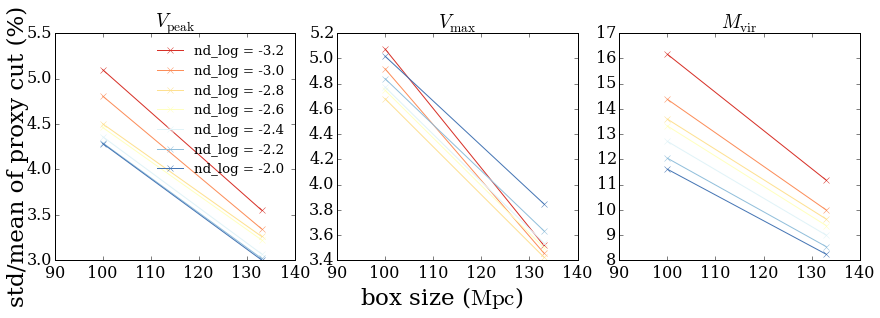

In [12]:
from palettable.colorbrewer.diverging import RdYlBu_7
def get_color(i):
    return RdYlBu_7.mpl_colors[i]

def nd_index(nd_log):
    return int((nd_log + 3.3)/0.1)

proxies = ['vpeak', 'vmax', 'mvir', 'macc']
proxies = ['vpeak', 'vmax', 'mvir']
case = 'darksky'
nd_log_list_this = [-3.2,-3.0, -2.8,-2.6, -2.4,-2.2, -2.0]

if case=='MDhigh' :box_size_list = np.array([125.,200.,250.,333.])
if case=='MDlow' : box_size_list = np.array([125.,250.,333.])
if case=='darksky':box_size_list = np.array([100.,133.])
std_over_mean = np.zeros((len(box_size_list), len(nd_log_list_this)))

fig, axarr = plt.subplots(ncols = len(proxies), nrows = 1, sharex=True, sharey=False, figsize=(4*len(proxies), 4.))
for k,(ax, proxy) in enumerate(zip(axarr, proxies)):
    for i,box_size in enumerate(box_size_list):
        for j, nd_log in enumerate(nd_log_list_this):
            proxycut = load_proxy_cut(proxy, box_size, case)
            std_over_mean[i,j] = 100*np.std(proxycut[:,nd_index(nd_log)])/np.mean(proxycut[:,nd_index(nd_log)])

    for j, nd_log in enumerate(nd_log_list_this):
        ax.plot(box_size_list, std_over_mean[:,j],'x-',c=get_color(j), label = nd_log)
    if k==0: ax.legend(['nd_log = {}'.format(nd_log) for nd_log in nd_log_list_this],frameon=False,numpoints=1, fontsize = 'small')
    if case != 'darksky':
        if k==0 or k==1: ax.set_ylim([0,5])
        if k==2 or k==3: ax.set_ylim([0,15])
    if case == 'darksky': ax.set_xlim([90,140])
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));

fig.text(0.01, 0.5, 'std/mean of proxy cut (%)', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'box size (${\rm Mpc}$)', ha='center', va='center', fontsize='x-large');
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
#plt.savefig('plots/darksky_proxycut.png')

In [65]:
test = load_proxy_cut('mvir',125.,'lowres_z1')
for i,a in enumerate(test):
    if len(a)!=14: print i,len(a) 

186 17


In [31]:
af.match(10**-3.35)

-22.077850889493348

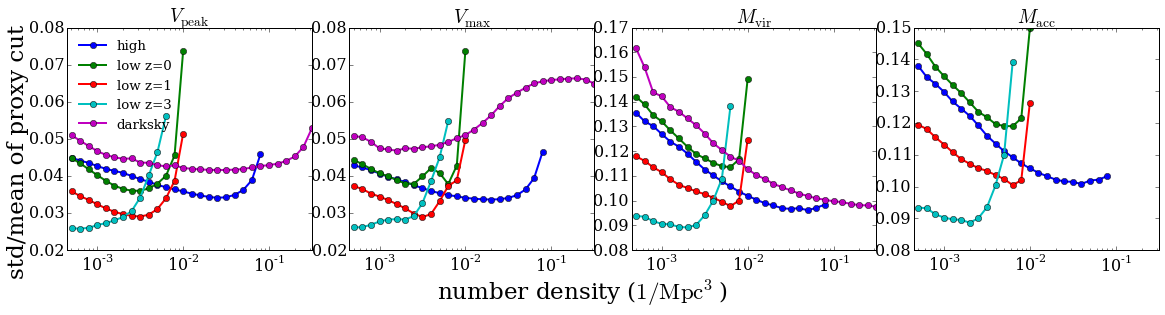

In [13]:
case = 'MDhigh_more'
cases = ('MDhigh_more','MDlow', 'lowres_z1','lowres_z3','darksky_more')
box_size = 125.
nd_log_list_dict = {'MDhigh_more':np.linspace(-3.3,-1.1,23), 'MDlow':np.linspace(-3.3,-2.0,14),\
                    'lowres_z1':np.linspace(-3.3,-2.0,14),'lowres_z3':np.linspace(-3.3,-2.2,12),\
                    'darksky':np.linspace(-3.3,-1.7,17),'darksky_more':np.linspace(-3.3,-0.5,29)}
legend_dict = {'MDhigh_more':'high','MDlow':'low z=0','lowres_z1':'low z=1','lowres_z3':'low z=3',\
               'darksky':'darksky','darksky_more':'darksky'}
proxies = ['vpeak', 'vmax', 'mvir', 'macc']


fig, axarr = plt.subplots(ncols = len(proxies), nrows = 1, sharex=True, sharey=False, figsize=(4*len(proxies), 4))
for ax, proxy in zip(axarr, proxies):
    for case in cases:
        if (case!='darksky' and case!='darksky_more') or proxy!='macc':
            nd_log_list_this = nd_log_list_dict[case]
            lum = af.match(10**nd_log_list_this)
            proxy_cut = load_proxy_cut(proxy, (box_size if (case!='darksky' and case!='darksky_more') else 100.), case)
            proxy_cut = np.array([arr for arr in proxy_cut if len(arr)==len(nd_log_list_this)])
            ax.semilogx(10.**nd_log_list_this, np.std(proxy_cut/np.mean(proxy_cut, axis = 0), axis = 0)\
                        ,'-o', lw=2, label=case)
            #ax.plot(lum, np.std(proxy_cut/np.mean(proxy_cut, axis = 0), axis = 0)\
            #            ,'-o', lw=2, label=case)
            #print case, proxy, len(proxy_cut)
    ax.set_xlim(10.**-3.35, 10**-0.5)
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
    if proxy=='vpeak':
        ax.legend([legend_dict[case] for case in cases],frameon=False, fontsize='small',\
                  loc='upper left',numpoints=1)
    
fig.text(0.01, 0.5, 'std/mean of proxy cut', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'number density ($1/{\rm Mpc}^3$)', ha='center', va='center', fontsize='x-large');
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
#plt.savefig('plots/proxycut_all.png')

In [8]:
len(load_proxy_cut('vmax',100, 'darksky_more'))

64

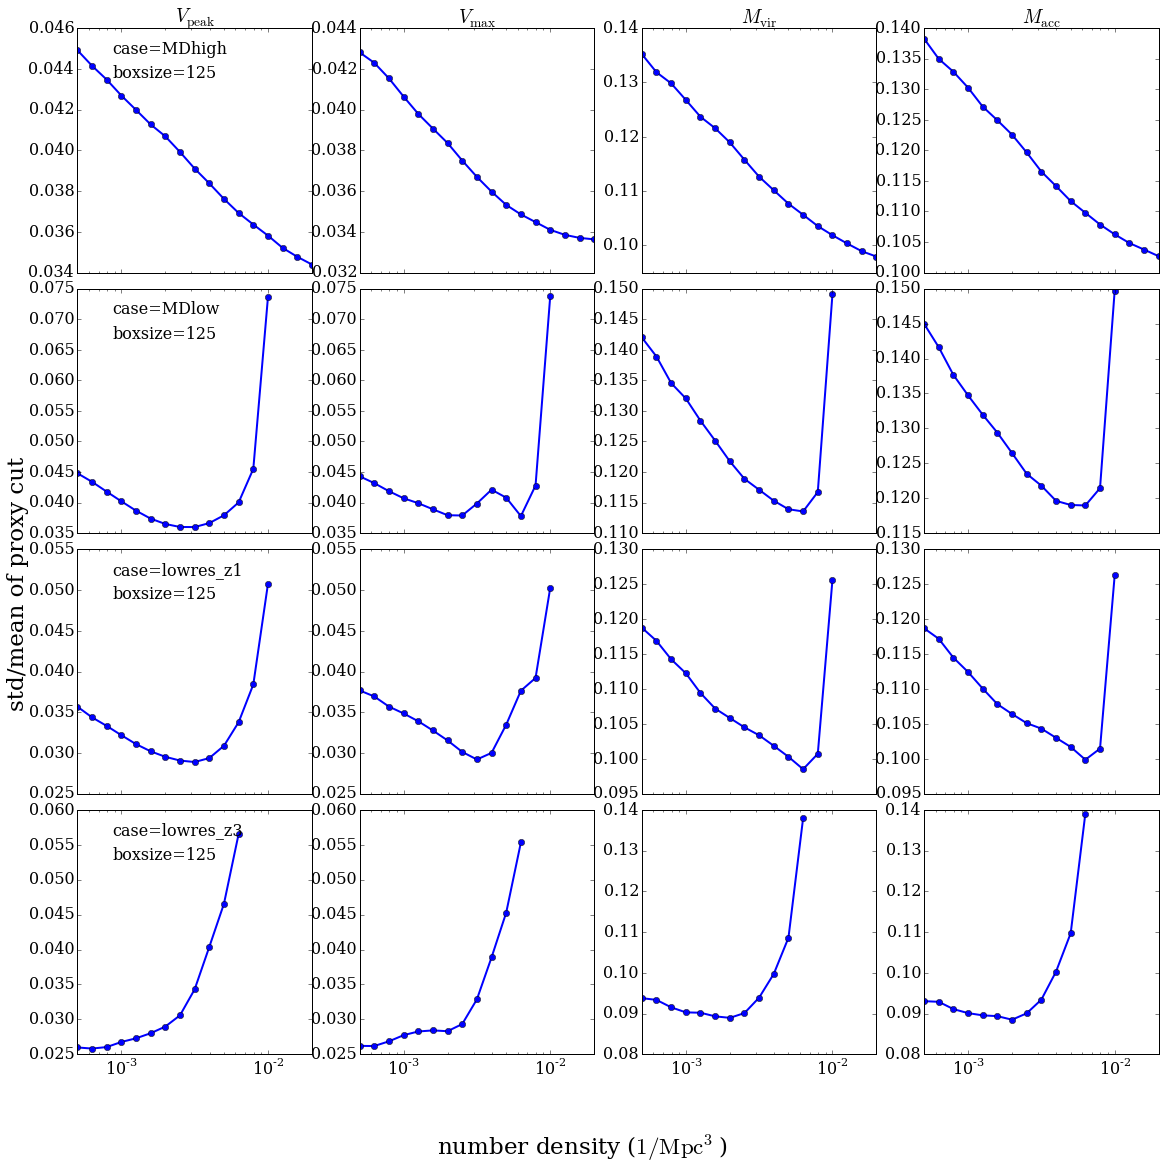

In [10]:
cases = ('MDhigh','MDlow','lowres_z1','lowres_z3')
box_size_dict = {'MDhigh':125., 'MDlow':125., 'darksky':100., 'c400-2048':100.,'lowres_z1':125.,'lowres_z3':125.}
nd_log_list_this = np.linspace(-3.3,-1.7,17)
proxies = ['vpeak', 'vmax', 'mvir', 'macc']

fig, axmat = plt.subplots(ncols = len(proxies), nrows = len(cases), sharex=True, sharey=False, figsize=(4*len(proxies), 4*len(cases)))
for i,(axarr, case) in enumerate(zip(axmat, cases)):
    box_size = box_size_dict[case] 
    if case=='MDlow' or case=='lowres_z1': nd_log_list_this = np.linspace(-3.3,-2.0,14)
    if case=='lowres_z3': nd_log_list_this = np.linspace(-3.3,-2.2,12)
    for j, (ax, proxy) in enumerate(zip(axarr, proxies)):
        if case!='darksky' or proxy!='macc':
            proxy_cut = load_proxy_cut(proxy, box_size, case)
            proxy_cut = np.array([arr for arr in proxy_cut if len(arr)==len(nd_log_list_this)])
            ax.semilogx(10.**nd_log_list_this, np.std(proxy_cut/np.mean(proxy_cut, axis = 0), axis = 0),'-o', lw=2)
        ax.set_xlim(10.**-3.3, 10**-1.7)
        if i==0: ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if j==0:  
            ax.text(0.15, 0.95, 'case='+case, transform=ax.transAxes, va='top')
            ax.text(0.15, 0.85, 'boxsize={:.0f}'.format(box_size_dict[case]), transform=ax.transAxes, va='top')
    nd_log_list_this = np.linspace(-3.3,-1.7,17)
fig.text(0.01, 0.5, 'std/mean of proxy cut', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'number density ($1/{\rm Mpc}^3$)', ha='center', va='center', fontsize='x-large');
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
plt.savefig('plots/proxycut_lowres_all.png')

## select few 27 or 64 samples from 125Mpc subboxes of Multidark

In [119]:
import random
np.sort(random.sample(np.arange(100),50))

array([ 0,  2,  4,  7,  8, 10, 11, 12, 14, 15, 20, 24, 25, 26, 29, 31, 32,
       37, 38, 41, 42, 43, 44, 45, 46, 47, 49, 56, 57, 58, 59, 60, 61, 64,
       65, 67, 69, 71, 73, 79, 82, 83, 86, 89, 90, 91, 95, 96, 98, 99])

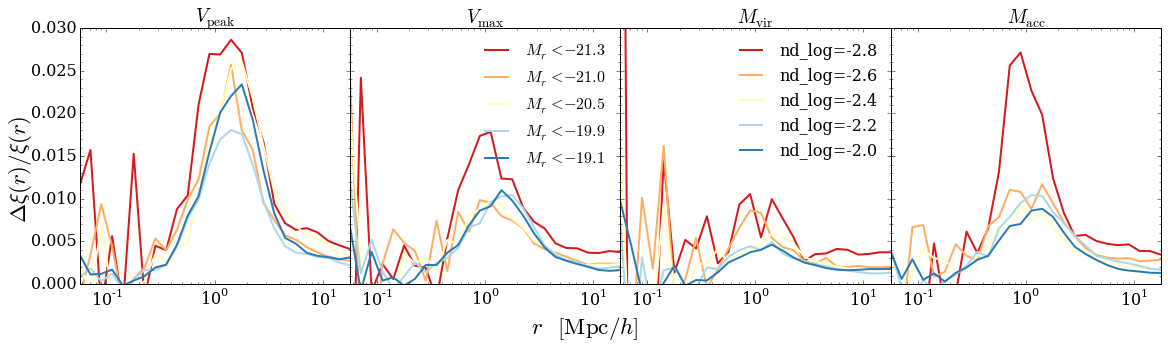

In [133]:
from palettable.colorbrewer.diverging import RdYlBu_5
def get_color(i):
    return RdYlBu_5.mpl_colors[i]

x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
#proxies = ['vpeak', 'vmax', 'mvir']
nd_log_list_this = ( -2.8, -2.6,-2.4, -2.2, -2.0)
case = 'MDhigh'
box_size = 125.
 
fig, axarr = plt.subplots(ncols=len(proxies), nrows=1, figsize=(4*len(proxies), 4.5), sharex=True, sharey=True)

for i, (ax, proxy) in enumerate(zip(axarr, proxies)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = random.sample(load_samples(proxy, nd_log, box_size, case), 64)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y**2 - y_poisson**2, c = get_color(j) , lw=2, label='nd_log={}'.format(nd_log))
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(-0.0,0.03)
    ax.minorticks_on()
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
    if i==2: ax.legend(loc='best', frameon=False, ncol=1, fontsize='medium');
    if i==1: ax.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) 
                        for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, fontsize='medium')
        
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/darksky_subtract_poisson_133.png')

## Sanity check

/u/ki/iameric/miniconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


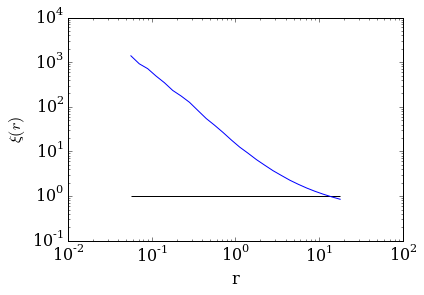

In [65]:
case = 'darksky'
box_size = 100.
proxy = 'mvir'
nd_log = -2.5
test = np.mean(load_samples(proxy, nd_log, box_size, case), axis=0)
rand = count_random_pairs(nd_log, box_size)
x = 0.5*(rbins[1:] + rbins[:-1])
plt.loglog(x, test/rand)
plt.hlines(1., x[0],x[-1])
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')


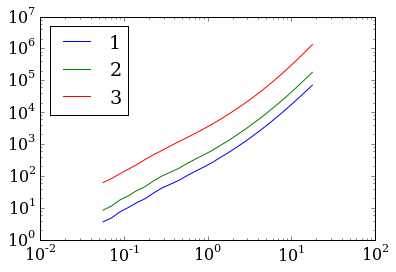

In [82]:
proxy = 'mvir'
nd_log = -2.5
x = 0.5*(rbins[1:] + rbins[:-1])
test1 = np.mean(load_samples(proxy, nd_log, 100., 'darksky'), axis = 0)
test2 = np.mean(load_samples(proxy, nd_log, 133., 'darksky'), axis = 0)
test3 = np.mean(load_samples(proxy, nd_log, 250., 'MDhigh'), axis = 0)
plt.loglog(x,test1, label = 1)
plt.loglog(x,test2, label = 2)
plt.loglog(x,test3, label = 3)
plt.legend(loc='best')

## testing

In [9]:
nd_log_list = np.linspace(-3.3, -1.7, 17)
rbins = np.logspace(-1.3,1.3,27)

In [2]:
halos = np.load('/u/ki/yymao/ki21/sham_test/resolution-test/c125-1024/hlist_1.00000.npy')

In [32]:
#hosts halos list
mcut = 2.e14
hosts = halos[halos['mvir']>mcut][['x','y','z']].view((float,3))
rvir = halos[halos['mvir']>mcut][['rvir']].view((float,1))
hostidx = halos[halos['mvir']>mcut][['id']].view((int,1))
hostidx

array([181628513, 181616906, 181599208, 181627294, 182931769, 182576559,
       182889804, 181755487, 182895244, 182367837, 181504260, 182138046,
       182607599, 182977031, 182532526])

In [50]:
proxy = 'mvir'
s = halos[proxy].argsort()

box_size = 125.
kk = (10.0**nd_log_list * (float(box_size)**3)).astype(int)
kk *= -1

points_all = halos[['x','y','z']].view((float, 3))
idx_all = halos['id'].view((int,1))

In [77]:
points = points_all[s[kk[-1]:]]
idx_list = idx_all[s[kk[-1]:]]

In [78]:
hostidx_nd = np.array([np.where(idx_list==idx)[0][0] for idx in hostidx])

In [79]:
not_subhalo_bool = np.ones(len(points), dtype=int)
with fast3tree(points) as tree:
    #tree.set_boundaries(0, box_size)
    #no periodic boundary condition
    for i, (p, rv, idx_nd) in enumerate(zip(hosts, rvir, hostidx_nd)):
        sublist = tree.query_radius(p, rv/1000., periodic=False, output='index')
        for k in sublist:
            if k!= idx_nd: not_subhalo_bool[k] = 0 
points = points[np.where(not_subhalo_bool)]

In [83]:
def remove_subhalos(halos, halos_nd, mcut = 1.e14):
    hosts = halos[halos['mvir']>mcut][['x','y','z']].view((float,3))
    rvir = halos[halos['mvir']>mcut][['rvir']].view((float,1))
    hostidx = halos[halos['mvir']>mcut][['id']].view((int,1))
    hostidx_nd = np.array([np.where(halos_nd['id'].view((int,1))==idx)[0][0] for idx in hostidx])
    points = halos_nd[list('xyz')].view((float,3))
    
    not_subhalo_bool = np.ones(len(points), dtype=int)
    with fast3tree(points) as tree:
        #tree.set_boundaries(0, box_size)
        #no periodic boundary condition
        for i, (p, rv, idx_nd) in enumerate(zip(hosts, rvir, hostidx_nd)):
            sublist = tree.query_radius(p, rv/1000., periodic=False, output='index')
            for k in sublist:
                if k!= idx_nd: 
                    not_subhalo_bool[k] = 0
    return halos_nd[np.where(not_subhalo_bool)]


In [84]:
test = remove_subhalos(halos, halos[s[kk[-1]:]], 1.e14)

In [90]:
test = np.load('../ki22/resolution_study/multidark/pairs_mvir/boxsize_125/remove_host/nd-2.0_idx00.npy')

In [52]:
test = range(5,15)
test1 = np.array([np.where(np.arange(10)==idx)[0] for idx in test])
test1 = np.array([i[0] for i in test1 if len(i)==1])
test1

array([5, 6, 7, 8, 9])

## change file names ({:02d} to {:03d})

In [29]:
# change naming conventions
import os

proxies = ['vpeak', 'vmax', 'mvir', 'macc']
for proxy in proxies:
    directory = '../ki22/resolution_study/multidark/pairs_{}/boxsize_125/remove_host/'.format(proxy)
    oldname = os.listdir(directory)
    for i,f in enumerate(oldname):
        idx = int(f.split('.')[-2].split('idx')[-1])
        name = f.split('idx')[0] + 'idx{:03d}'.format(idx) + '.npy'
        #os.rename(directory + f, directory + name)

#/nfs/slac/g/ki/ki20/cosmo/behroozi/MultiDark/hlists

## Import halo catalog

In [3]:
#halos = np.load('/u/ki/lehmann/lustre/multidark/NewMDPL/hlists/hlist_1.00000.npy')

In [10]:
def load_JK_sample(fpath = '/u/ki/lehmann/lustre/multidark/NewMDPL/hlists/hlist_1.00000.npy', JKidx = 0):
    halos = np.load(fpath)
    pos = np.mod(halos[['x','y','z']].view((float, 3)),1000)
    halos = halos[np.ravel_multi_index(np.floor_divide(pos,125).astype(int).T, (8,8,8)) == JKidx]
    return halos

In [5]:
halos_JK = load_JK_sample(1)

In [7]:
halos_JK.dtype

dtype([('id', '<i8'), ('pid', '<i8'), ('upid', '<i8'), ('mvir', '<f8'), ('macc', '<f8'), ('mpeak', '<f8'), ('vmax', '<f8'), ('vpeak', '<f8'), ('Vmax@Mpeak', '<f8'), ('vacc', '<f8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('vz', '<f8'), ('rvir', '<f8'), ('rs', '<f8'), ('mpeak_scale', '<f8')])

In [33]:
proxy = 'mvir'
JKidx = 2


#settings
rbins = np.logspace(-1.3, 1.3, 27)
nd_log_list = np.linspace(-3.3, -1.7, 17)

box_size = 125.

#hlist_path = '/u/ki/lehmann/lustre/multidark/NewMDPL/hlists/hlist_1.00000.npy'
halos = halos_JK
s = halos[proxy].argsort()

k = (10.0**nd_log_list * (float(box_size)**3)).astype(int)
k *= -1

points = halos[list('xyz')].view((float, 3))

j = k[10]
test2 = count_pairs(points[s[j:]], rbins, box_size)

#for j, nd_log in zip(k, nd_log_list):
#    fname = '../ki22/resolution_study/multidark/pairs_{}/nd{:.1f}_JKidx{}'.format(proxy, nd_log, JKidx)
#    np.save(fname, count_pairs(points[s[j:]], rbins, float(box_size)))
    
    
##save the threshold proxy value at each nd_log
#proxy_cut = np.array(halos[proxy][s[j]] for j in k)
#fname = 'multidark/pairs_{}/proxycut_JKidx{}'.format(proxy, JKidx)
#np.save(fname, proxy_cut)

In [38]:
test

array([    51,     64,     87,    115,    166,    218,    300,    419,
          591,    795,   1106,   1484,   2056,   2795,   3945,   5681,
         8072,  11726,  17130,  25810,  39449,  61597,  99375, 164144,
       277699, 477127, 838888])

In [70]:
test = np.mod(halos[2::100][['x','y','z']].view((float, 3)), 1000)
test = test[np.ravel_multi_index(np.floor_divide(test, 125).astype(int).T, (8,8,8)) == 0]

(array([ 211.,  201.,  176.,  214.,  177.,  192.,  179.,  183.,  185.,  231.]),
 array([  3.35300000e-02,   1.25256530e+01,   2.50177760e+01,
          3.75098990e+01,   5.00020220e+01,   6.24941450e+01,
          7.49862680e+01,   8.74783910e+01,   9.99705140e+01,
          1.12462637e+02,   1.24954760e+02]),
 <a list of 10 Patch objects>)

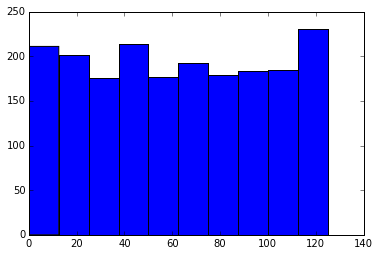

In [57]:
plt.hist(test[:,2])

In [40]:
np.floor_divide(test,125).shape

(127389, 3)

In [37]:
boolarray = np.zeros((8,8,8))
JKidx = 0
for i in range(8):
    for j in range(8):
        for k in range(8):
            boolarray[i,j,k] = np.ravel_multi_index((i,j,k), (8,8,8)) == JKidx

In [29]:
np.ravel_multi_index(np.floor_divide(test, 125).astype(int).T, (8,8,8)) == 0

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [11]:
halos.dtype.names

('id',
 'pid',
 'upid',
 'mvir',
 'macc',
 'mpeak',
 'vmax',
 'vpeak',
 'Vmax@Mpeak',
 'vacc',
 'x',
 'y',
 'z',
 'vz',
 'rvir',
 'rs',
 'mpeak_scale')

(array([ 129081.,  128527.,  130486.,  125863.,  127486.,  128380.,
         127563.,  124213.,  127544.,  124739.]),
 array([  1.00000000e-05,   9.99999850e+01,   1.99999960e+02,
          2.99999935e+02,   3.99999910e+02,   4.99999885e+02,
          5.99999860e+02,   6.99999835e+02,   7.99999810e+02,
          8.99999785e+02,   9.99999760e+02]),
 <a list of 10 Patch objects>)

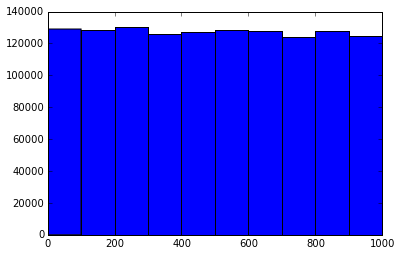

In [12]:
plt.hist(halos['y'][::100])